# NBA Player Data

### One .csv from:
https://www.kaggle.com/drgilermo/nba-players-stats

### Data collected by Omri Goldstein from Kaggle with 162 votes by the community. He scraped this from basketball-reference.com.

### Data Contents: NBA Player Stats from 1950-2017


* Seasons_Stats.csv: Very detailed season stats for every NBA player. Describes important game statistics as column headers including: 

    Team, games, games started, minutes played, player efficiency rating, true shooting percent, 3 point attempt rate, free throw rate, offensive rebound percentage, etc. 
    
    Size - 24.7k x 53




# Why this dataset?

## These datasets are required to answer the following questions


# Questions:
* How have injuries impacted player performance?
 
    * Do they perform the same or worse after returning?
    * Case study: Grant Hill, hall of famer remembered for a knee injury that plagued his career. 
    
* How do Lebron James' stats reflect his age? Is Lebron slowing down with age, staying the same, or is he getting even better? 



In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce


In [38]:
season_stats = pd.read_csv("nba-players-stats/Seasons_Stats.csv")

In [39]:
season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


# Cleaning:

* Problems: Some entries are NaN for a few reasons. Some stats didn't exist in certain years, eg. 3 pointers weren't added until '79. In other years, certain stats (TOV, ORB, DRB, etc) were just simply not recorded. For these entries, the csv records null. 


* This problem only applies to "antique" player records. We do not have this entry discrepency with modern players. 

# Question 1 - How have injuries impacted player performance?

## Starting with a given player, find the year when their injury happened and look at some essential stats:
* G: Games
* MP: Minutes Played
* PER: Player Efficiency Rating
    * This is the official "all in one basketball rating, which attempts to boil down all of a player's contributions into one number" - (https://en.wikipedia.org/wiki/Player_efficiency_rating)




# The Case of Grant Hill

* The years we're interested in are his full, healthy seasons before injury: 1995-2001 and his seasons after: 2002-2013

## First, we will examine his PER. 

In [40]:
# Collect averages of a given stat between the given years
# stat parameter should be given a stat that is calculatable, i.e floats and integers only
def average_stats(player_name, dataframe, stat, year_start, year_end):
    
    if(np.issubdtype(dataframe[stat].dtype, np.number)):
        
    
        #return dataframe of a given player_name
        player_stats = dataframe.loc[dataframe["Player"] == player_name] 


        #get range of rows of desired year onwards
        player_stats_year = player_stats[(player_stats["Year"] >= year_start) & (player_stats["Year"] <= year_end)] 


        #get all rows of the 'stat' parameter column 
        stat_values = player_stats_year.loc[:, stat] 

        average = reduce((lambda x, y: x + y), stat_values)/ len(stat_values)
    else:
        return "Error: Select a column that consists of numbers. "
    
    print (f'{average} is {player_name}\'s average {stat} score between {year_start} to {year_end}.')
    
    return average

    
    
    
        

In [41]:
beforeInjury = average_stats("Grant Hill", season_stats, "PER", 1995, 2001)
afterInjury = average_stats("Grant Hill", season_stats, "PER", 2002, 2013)
injury_impact = beforeInjury - afterInjury



21.87142857142857 is Grant Hill's average PER score between 1995 to 2001.
15.409090909090908 is Grant Hill's average PER score between 2002 to 2013.


## Secondly, we'll look at his Games played and Minutes played
* 2 important stats that can serve as a general indicator of a player's consistency and overall fitness. 

In [42]:
# *years contains tuple of years where indices 0,1 are years before injury and 2,3 years after
def injury_impact(player_name, stat, *years):
    
    before = average_stats(player_name, season_stats, stat, years[0], years[1])
    after = average_stats(player_name, season_stats, stat, years[2], years[3])
    
    injury_impact = before - after
    
    if(injury_impact < 0):
        return f'The impact of injury is: {injury_impact}. Fortunately, this player has improved after injury.'
         
    else:
        return f'The impact of injury is: {injury_impact}. Unfortunately, this player has declined after injury.'


In [43]:
print(injury_impact("Grant Hill", "G", 1995, 2001, 2002, 2013))
print('\n\n')
print(injury_impact("Grant Hill", "PER", 1995, 2001, 2002, 2013))

62.714285714285715 is Grant Hill's average G score between 1995 to 2001.
53.36363636363637 is Grant Hill's average G score between 2002 to 2013.
The impact of injury is: 9.350649350649348. Unfortunately, this player has declined after injury.



21.87142857142857 is Grant Hill's average PER score between 1995 to 2001.
15.409090909090908 is Grant Hill's average PER score between 2002 to 2013.
The impact of injury is: 6.462337662337662. Unfortunately, this player has declined after injury.


# Conclusion to Q1:
* Both Grant Hill's average PER and G/MP declined after the year 2001, which is when his injury happened. 
* While this code doesn't take into account other factors that can affect these 3 stats, such as age, team changes, position changes, etc, it can give us a general idea of the impact of his injury on his NBA career.
* The functions used to answer Q1 can be used to analyze other players  by adjusting the parameters. 

# Question 2 - Do Lebron James' stats reflect his age? Is Lebron slowing down with age, staying the same, or is he getting even better? 


* Key stats to look for: 
    Games (G), Games Started (GS), Minutes Played (MP), PER, effective field goal percentage (eFG%), PTS (points per season), AST (assists per season), STL (steals per season), BLK (blocks per season)
    
* Method: Examine these stats for each year. If needed, compare them to __career averages__. 

75.78571428571429 is LeBron James's average G score between 2003 to 2017.


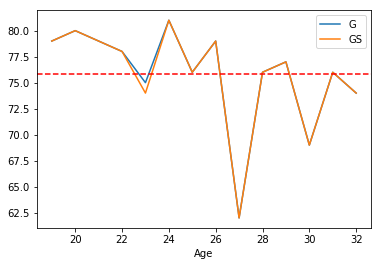

In [44]:
# Plot age against Games played

lebron_stats = season_stats.loc[season_stats["Player"] == "LeBron James"]
plt.figure()

# Get current axis to use for additional axis ax keyword arg
ax = plt.gca() 
averageG = average_stats("LeBron James", lebron_stats, "G", 2003, 2017) #career average, not average of other players

# Plot G and GS over eachother
lebron_stats.plot(kind = 'line', x = "Age", y = "G", ax = ax)
lebron_stats.plot(kind = 'line', x = "Age", y = "GS", ax = ax)

plt.axhline(averageG, color = 'r', linestyle = "--")

prin

## First impressions: 
* By overlaying his games started over games, with respect to age, we can see that age has __not__ affected his ability to play on the starting 5. In other words, age has not caused him to be benched in favor of younger players.
* However, he is currently playing __fewer games per season than average__.

## Minutes Played
* We see LeBron's MP dip __below__ his average as he ages. 

2948.0 is LeBron James's average MP score between 2003 to 2017.


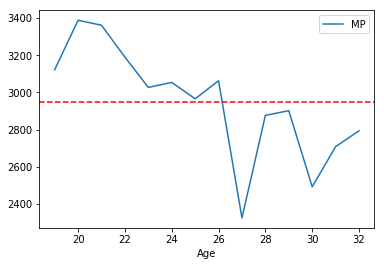

In [45]:
plt.figure()
ax = plt.gca()

lebron_stats.plot(kind = "line", x = "Age", y = "MP", ax = ax)

#Overlay average minutes played with this graph

averageMP = average_stats("LeBron James", lebron_stats, "MP", 2003, 2017)

plt.axhline(averageMP, color = 'r', linestyle = '--' )

# Performance efficiency rating
* LeBron has been quite consistent with his PER, apart from the outliers from his rookie years, he has __maintained a PER at or above his average.__

27.699999999999996 is LeBron James's average PER score between 2003 to 2017.


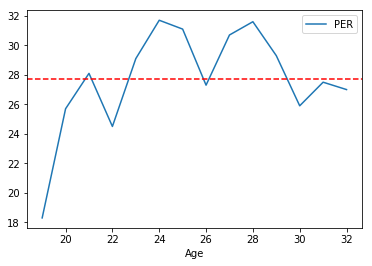

In [46]:
lebron_stats.plot(kind = 'line', x = "Age", y = "PER")
averagePER = average_stats("LeBron James", lebron_stats, "PER", 2003, 2017)
plt.axhline(averagePER, color = 'r', linestyle = '--' )

# eFG%:
* In recent years, LeBron has __exceeded or matched__ his average eFG%.

0.5389285714285715 is LeBron James's average eFG% score between 2003 to 2017.


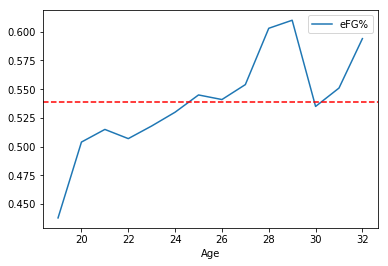

In [47]:
lebron_stats.plot(kind = 'line', x = "Age", y = "eFG%")
averageEFG = average_stats("LeBron James", lebron_stats, "eFG%", 2003, 2017)

# plot average against trend
plt.axhline(averageEFG, color = 'r', linestyle = '--' )

# Points, assists, steals, blocks
* Plot points and assists separately due to higher value ranges
* We observe that his points, steals, and blocks are __below career average__ in recent years. 
* However, his assists are currently __above average__.

124.92857142857143 is LeBron James's average STL score between 2003 to 2017.
58.357142857142854 is LeBron James's average BLK score between 2003 to 2017.


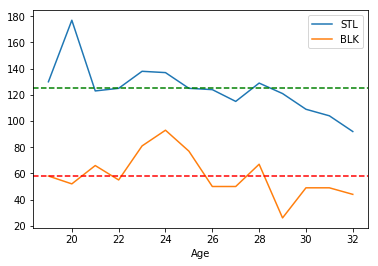

In [48]:
ax = plt.gca()

lebron_stats.plot(kind = "line", x = "Age", y = "STL", ax=ax)
averageSTL = average_stats("LeBron James", lebron_stats, "STL", 2003, 2017)

lebron_stats.plot(kind = "line", x = "Age", y = "BLK", ax=ax)
averageBLK = average_stats("LeBron James", lebron_stats, "BLK", 2003, 2017)

# plot average against trend
plt.axhline(averageSTL, color = "g", linestyle = "--")
plt.axhline(averageBLK, color = "r", linestyle = "--")

532.9285714285714 is LeBron James's average AST score between 2003 to 2017.


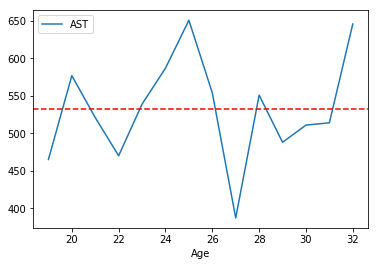

In [49]:
lebron_stats.plot(kind = "line", x = "Age", y = "AST")
averageAST = average_stats("LeBron James", lebron_stats, "AST", 2003, 2017)

plt.axhline(averageAST, color = 'r', linestyle = "--")

2056.214285714286 is LeBron James's average PTS score between 2003 to 2017.


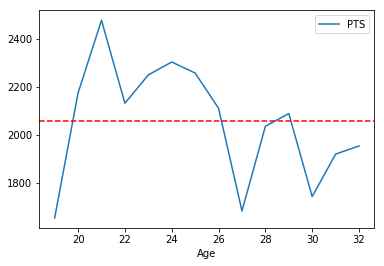

In [50]:
lebron_stats.plot(kind = "line", x = "Age", y = "PTS")
averagePTS = average_stats("LeBron James", lebron_stats, "PTS", 2003, 2017)

plt.axhline(averagePTS, color = 'r', linestyle = "--")

# Conclusion to Q2:
* By plotting LeBron's stat trend against age, we are able to conclude that the following stats have __improved or stayed the same__ with age.
    * PER, eFG%, AST
* However, some stats have definitely __fallen off__ with age: 
    * MP, G, PTS, STL, BLK
    
## Has age caused LeBron to decline? 
* Yes, in some aspects. However, he has improved in both PER and eFG%, both of which are significant stats that cannot be ignored.

# Validate Calculations
## The only descriptive statistics I did was find the mean of certain player stats. 
* These player stats were: PER, eFG%, AST, MP, G, GS, PTS, STL, BLK

### Validation Method:
* I will export the NBA dataset to excel, find the mean, and compare to my own. 

Excel Averages: 
* G = 75.78
* GS = 75.71
* MP = 2948
* PER = 27.7
* PTS = 2056.214

----My calculations match up-----

I only calculated these few player stats because Google Sheets is not column labeled, and my dataset has over 50 columns. It's hard to identify which column represents which player stat. The averages of my program are accurate to the spreadsheets. 